# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Denisa Dwi Nanjalina]
- **Email:** [denisadwi793@gmail.com]
- **ID Dicoding:** [denisadwinanjalina]

## Menentukan Pertanyaan Bisnis

-Bagaimana pengaruh dari faktor cuaca terhadap jumlah total pengguna sepeda pada hari kerja dibandingkan dengan hari libur atau tidak bekerja?

-Apakah terdapat hubungan antara jam jam tertentu dengan pola penyewaan sepeda dalam sehari ?


## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats


## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv("https://raw.githubusercontent.com/denisadwi793/bike-sharing/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/denisadwi793/bike-sharing/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data

* Menilai data day_df
* Kita akan memeriksa jumlah dan tipe data tiap kolom yang berada pada day_df




In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# **Missing value**

In [16]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# **Duplicates**

menyelidiki apakah data duplikat atau tidak

In [27]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


# **Invalid values**

In [32]:
hour_df[hour_df['cnt'] < 0]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [33]:
day_df[day_df['cnt'] < 0]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


# **Inaccurate values**

In [37]:
day_df[(day_df['temp'] < 0) | (day_df['temp'] > 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [38]:
hour_df[(hour_df['temp'] < 0) | (hour_df['temp'] > 1)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


# **Inconsistent values**

In [42]:
day_df[~day_df['season'].isin([1, 2, 3, 4])]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [43]:
hour_df[~hour_df['season'].isin([1, 2, 3, 4])]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Outlier

In [45]:
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (day_df['cnt'] < (Q1 - 1.5 * IQR)) | (day_df['cnt'] > (Q3 + 1.5 * IQR))
outliers = day_df[outlier_condition]


In [46]:
outliers

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [49]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (hour_df['cnt'] < (Q1 - 1.5 * IQR)) | (hour_df['cnt'] > (Q3 + 1.5 * IQR))
outliers = hour_df[outlier_condition]


In [50]:
outliers

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,16886,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,16910,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,16934,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,17054,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


**Insight:**
- Berdasarkan output diatas dapat terlihat bahwa dataset day_df dan hour_df tidak memiliki missing value, duplikat data, invalid value, inaccurate values, dan incosistent values.
- Berdasarkan output diatas dapat terlihat bahwa dataset hor_df memiliki outlier.
- Berdasarkan output diatas dapat terlihat bahwa dataset day_df dan hour_df terdapat kesalahan tipe data untuk kolom dteday menggunakan function info().

### Cleaning Data

1.   Kita akan mengatasi permasalahan  outliers pada  dataset hour_df dengan metode drop





In [54]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = hour_df['cnt'] < minimum
kondisi_more_than = hour_df['cnt'] > maximum

hour_df_dropped = hour_df.drop(hour_df[kondisi_lower_than].index)
hour_df_dropped = hour_df_dropped.drop(hour_df_dropped[kondisi_more_than].index)
print("Dataset setelah drop outliers:\n", hour_df_dropped)
jumlah_baris_sebelum = len(hour_df)
print(f"Jumlah baris sebelum menghapus outliers: {jumlah_baris_sebelum}")

Dataset setelah drop outliers:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

In [56]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Selanjutnya kita akan mengatasi masalah pada day_df dan hour_df dengan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.



In [59]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [60]:
column = "dteday"
day_df[column] = pd.to_datetime(day_df[column])

In [61]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [62]:
column = "dteday"
hour_df[column] = pd.to_datetime(hour_df[column])

In [63]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Setelah mengalami outlier,jumlah baris berkurang dari 17.379 menjadi 16.874. Hal ini berarti bahwa ada 505 data poin yang diidentifikasi sebagai outliers dan dihapus untuk membersihkan dataset, agar hasil analisis lebih akurat dan relevan.
- Telah berhasil membersihkan kesalahan tipe data object menjadi datetime pada tabel hour_df dan day_df di kolom dteday menggunakan function to_datetime() yang disediakan oleh library pandas.

## Exploratory Data Analysis (EDA)

**Explore day_df**


**Menampilkan rangkuman parameter statistik dengan menggunakan function describe()**

In [69]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Menampilkan kolerasi antara cuaca dengan total pengguna dengan menggunakan function groupby()**

In [71]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                     
           nunique      sum   max  min         mean          std
weathersit                                                      
1              463  2257952  8714  431  4876.786177  1879.483989
2              247   996858  8362  605  4035.862348  1809.109918
3               21    37869  4639   22  1803.285714  1240.284449

**Menampilkan kolerasi antara cuaca, hari bekerja dan total pengguna dengan menggunakan function groupby()**

In [83]:
day_df.groupby(by=["weathersit", "workingday"]).agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                     
                      nunique      sum   max  min         mean          std
weathersit workingday                                                      
1          0              156   715614  8714  754  4587.269231  2047.547484
           1              307  1542338  8173  431  5023.902280  1773.485099
2          0               70   275578  7852  605  3936.828571  1925.475601
           1              177   721280  8362  683  4075.028249  1765.122364
3          0                5     9077  4459  627  1815.400000  1595.990226
           1               16    28792  4639   22  1799.500000  1171.221812

Bagaimana pengaruh dari faktor cuaca terhadap jumlah total pengguna sepeda pada hari kerja dibandingkan dengan hari libur atau tidak bekerja?:

In [86]:
weather_workday_df = day_df[day_df["workingday"] == 1].groupby(["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()
# karena tidak ada cuaca 4 maka akan kita tambahkan cuaca 4 dengan cnt bernilai 0.
if not (weather_workday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_workday_df = pd.concat([weather_workday_df, new_row], ignore_index=True)

weather_workday_df.rename(columns={
    "weathersit": "weather_index",
    "cnt": "users_count"
}, inplace=True)

weather_workday_df.head()

,weather_index,users_count
0,1,1542338
1,2,721280
2,3,28792
3,4,0


**korelasi antara cuaca dengan hari libur**

In [88]:
weather_workday_df = day_df[day_df["workingday"] == 0].groupby(["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()
# karena tidak ada cuaca 4 maka akan kita tambahkan cuaca 4 dengan cnt bernilai 0.
if not (weather_workday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_workday_df = pd.concat([weather_workday_df, new_row], ignore_index=True)

weather_workday_df.rename(columns={
    "weathersit": "weather_index",
    "cnt": "users_count"
}, inplace=True)

weather_workday_df.head()

,weather_index,users_count
0,1,715614
1,2,275578
2,3,9077
3,4,0


**Explore hour_df**


Menampilkan rangkuman parameter statistik dengan menggunakan function describe()

In [91]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Menampilkan kolerasi antara jam-jam tertentu dengan total pengguna dengan menggunakan function groupby()

In [95]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant     cnt                                 
   nunique     sum  max min        mean         std
hr                                                 
0      726   39130  283   2   53.898072   42.307910
1      724   24164  168   1   33.375691   33.538727
2      715   16352  132   1   22.869930   26.578642
3      697    8174   79   1   11.727403   13.239190
4      697    4428   28   1    6.352941    4.143818
5      717   14261   66   1   19.889819   13.200765
6      725   55132  213   1   76.044138   55.084348
7      727  154171  596   1  212.064649  161.441936
8      727  261001  839   5  359.011004  235.189285
9      727  159438  426  14  219.309491   93.703458
10     727  126257  539   8  173.668501  102.205413
11     727  151320  663  10  208.143054  127.495536
12     728  184414  776   3  253.315934  145.081134
13     729  184919  760  11  253.661180  148.107657
14     729  175652  750  12  240.949246  147.271574
15     729  183149  750   7  251.233196  144.632541
16     730  227748  783  11  311.983562  148.682618
17     730  336860  976  15  461.452055  232.656611
18     728  309772  977  23  425.510989  224.639304
19     728  226789  743  11  311.523352  161.050359
20     728  164550  567  11  226.030220  119.670164
21     728  125445  584   6  172.314560   89.788893
22     728   95612  502   9  131.335165   69.937782
23     728   63941  256   2   87.831044   50.846889

Menambah kolom hr_group yang berisi kelompok jam berdasarkan pembagian jam menggunakan apply()

In [98]:
hour_df["hr_group"] = hour_df.hr.apply(lambda x: "Dini Hari" if x>=0 and x<6
                                       else ("Pagi" if x>=6 and x<11
                                             else ("Siang" if x>=11 and x<15
                                                   else "Sore" if x>=15 and x<18 else "Malam")
                                            )
                                      )
hour_df.groupby(by="hr_group").instant.nunique().sort_values(ascending=False)

hr_group
Malam        4368
Dini Hari    4276
Pagi         3633
Siang        2913
Sore         2189
Name: instant, dtype: int64

Menampilkan kolerasi antara kelompok jam-jam tertentu dengan total pengguna dengan menggunakan function groupby()

**Insight**

Pada Explorasi Data day_df menampilkan hubungan/kolerasi antara cuaca dengan hari bekerja dimana ditemukan bahwa pada cuaca 4 tidak ada pengguna sama sekali sedangkan jumlah serta rata-rata pengguna paling banyak terletak di cuaca 1 khususnya pada hari bekerja dan jumlah pengguna paling sedikit terletak di cuaca 3.

Pada Explorasi Data hour_df menampilkan hubungan/kolerasi antara kelompok jam tertentu dimana ditemukan bahwa pengguna sepeda memuncak di malam hari.

## Visualization & Explanatory Analysis

**Bagaimana pengaruh dari faktor cuaca terhadap jumlah total pengguna sepeda pada hari kerja dibandingkan dengan hari libur atau tidak bekerja?**

**Kolerasi antara cuaca dengan hari bekerja**

In [107]:
weather_workday_df = day_df[day_df["workingday"] == 1].groupby(["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()
# karena tidak ada cuaca 4 maka akan kita tambahkan cuaca 4 dengan cnt bernilai 0.
if not (weather_workday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_workday_df = pd.concat([weather_workday_df, new_row], ignore_index=True)

weather_workday_df.rename(columns={
    "weathersit": "weather_index",
    "cnt": "users_count"
}, inplace=True)

weather_workday_df.head()

,weather_index,users_count
0,1,1542338
1,2,721280
2,3,28792
3,4,0


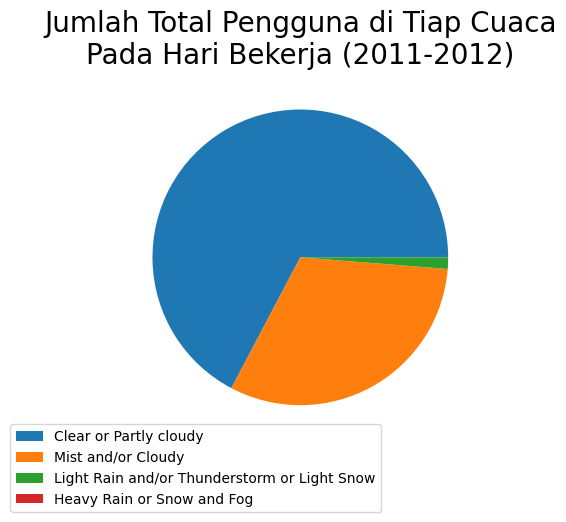

In [109]:
fig, ax = plt.subplots()
labels_detail = [
    'Clear or Partly cloudy',
    'Mist and/or Cloudy',
    'Light Rain and/or Thunderstorm or Light Snow',
    'Heavy Rain or Snow and Fog'
]
size = weather_workday_df["users_count"]
pie = plt.pie(size, startangle=0)
title = plt.title("Jumlah Total Pengguna di Tiap Cuaca\nPada Hari Bekerja (2011-2012)", fontsize=20)
title.set_ha("center")
plt.legend(
    pie[0],
    labels_detail,
    bbox_to_anchor=(0.65,-0.05),
    loc="lower right",
    bbox_transform=plt.gcf().transFigure
)
plt.show()

**Kolerasi antara cuaca dengan hari libur**

In [112]:
weather_workday_df = day_df[day_df["workingday"] == 0].groupby(["weathersit"]).cnt.sum().sort_values(ascending=False).reset_index()
# karena tidak ada cuaca 4 maka akan kita tambahkan cuaca 4 dengan cnt bernilai 0.
if not (weather_workday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_workday_df = pd.concat([weather_workday_df, new_row], ignore_index=True)

weather_workday_df.rename(columns={
    "weathersit": "weather_index",
    "cnt": "users_count"
}, inplace=True)

weather_workday_df.head()

,weather_index,users_count
0,1,715614
1,2,275578
2,3,9077
3,4,0


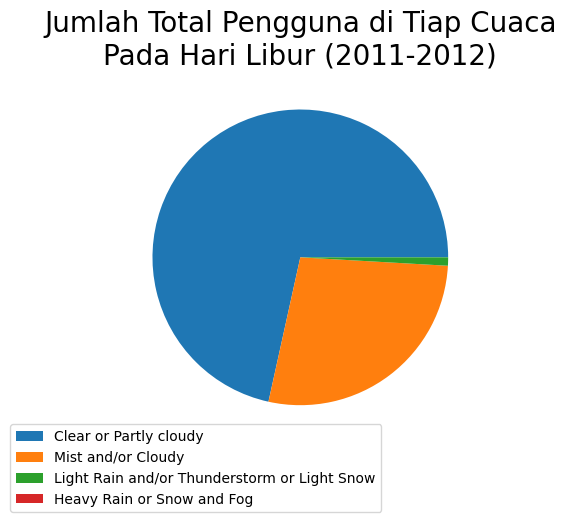

In [114]:
fig, ax = plt.subplots()
labels_detail = [
    'Clear or Partly cloudy',
    'Mist and/or Cloudy',
    'Light Rain and/or Thunderstorm or Light Snow',
    'Heavy Rain or Snow and Fog'
]
size = weather_workday_df["users_count"]
pie = plt.pie(size, startangle=0)
title = plt.title("Jumlah Total Pengguna di Tiap Cuaca\nPada Hari Libur (2011-2012)", fontsize=20)
title.set_ha("center")
plt.legend(
    pie[0],
    labels_detail,
    bbox_to_anchor=(0.65,-0.05),
    loc="lower right",
    bbox_transform=plt.gcf().transFigure
)
plt.show()

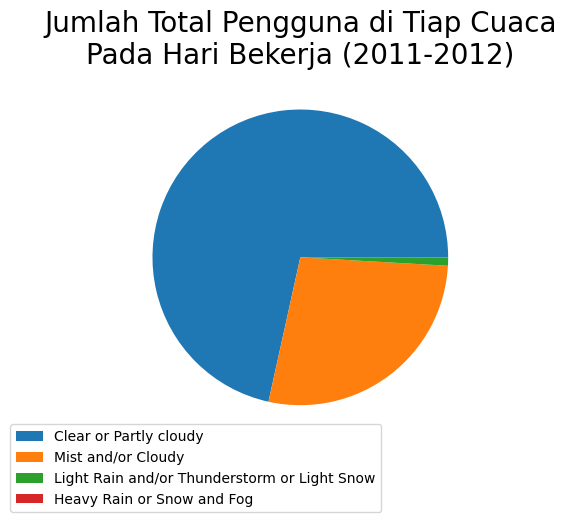

In [116]:
fig, ax = plt.subplots()
labels_detail = [
    'Clear or Partly cloudy',
    'Mist and/or Cloudy',
    'Light Rain and/or Thunderstorm or Light Snow',
    'Heavy Rain or Snow and Fog'
]
size = weather_workday_df["users_count"]
pie = plt.pie(size, startangle=0)
title = plt.title("Jumlah Total Pengguna di Tiap Cuaca\nPada Hari Bekerja (2011-2012)", fontsize=20)
title.set_ha("center")
plt.legend(
    pie[0],
    labels_detail,
    bbox_to_anchor=(0.65,-0.05),
    loc="lower right",
    bbox_transform=plt.gcf().transFigure
)
plt.show()

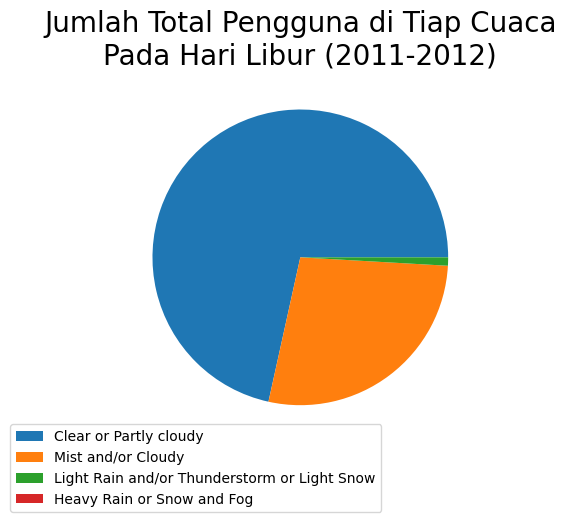

In [118]:
fig, ax = plt.subplots()
labels_detail = [
    'Clear or Partly cloudy',
    'Mist and/or Cloudy',
    'Light Rain and/or Thunderstorm or Light Snow',
    'Heavy Rain or Snow and Fog'
]
size = weather_workday_df["users_count"]
pie = plt.pie(size, startangle=0)
title = plt.title("Jumlah Total Pengguna di Tiap Cuaca\nPada Hari Libur (2011-2012)", fontsize=20)
title.set_ha("center")
plt.legend(
    pie[0],
    labels_detail,
    bbox_to_anchor=(0.65,-0.05),
    loc="lower right",
    bbox_transform=plt.gcf().transFigure
)
plt.show()

**Apakah terdapat hubungan antara jam jam tertentu dengan pola penyewaan sepeda dalam sehari ?**

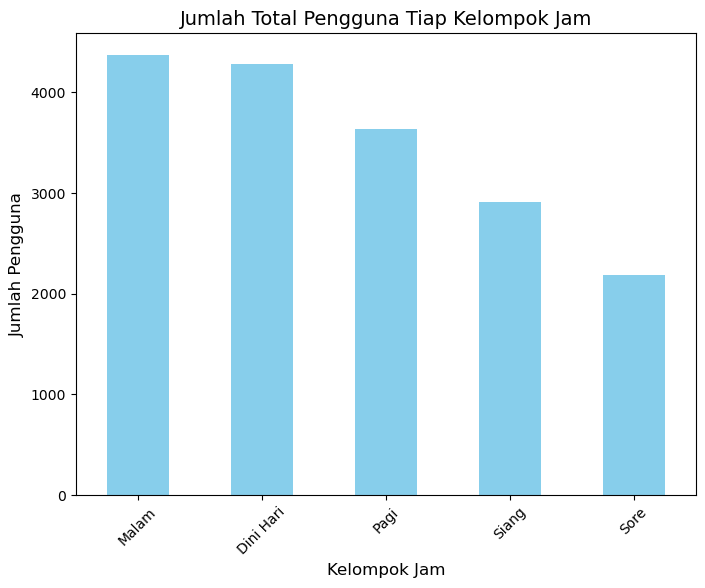

In [121]:
# Mengelompokkan data berdasarkan 'hr_group' dan menghitung jumlah 'instant' unik
grouped_data = hour_df.groupby('hr_group')['instant'].nunique().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Total Pengguna Tiap Kelompok Jam', fontsize=14)
plt.xlabel('Kelompok Jam', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)

# Menampilkan plot
plt.xticks(rotation=45)
plt.show()

**Insight:**
-

## Analisis Lanjutan (Opsional)

## Conclusion

- Jadi dapat disimpulkan bahwa terdapat korelasi diantara faktor cuaca dan total pengguna Bike Sharing baik pada hari kerja maupun hari libur atau tidak bekerja, dikarenakan keduanya saling bersesuaian dan tidak berlawanan. Pie Chart diatas merupakan salah satu faktor pendukung bahwa Faktor Cuaca yang menyebabkan adanya hubungan yang bersesuaian antara Faktor Cuaca di hari bekerja dan Faktor Cuaca di hari libur dengan Total pengguna Bike Sharing. Salah satu faktor pendukung lainnya berada di Eksplorasi Data day_df dimana meskipun total pengguna Bike Sharing di setiap cuaca pada hari bekerja lebih besar dibandingkan dengan total pengguna di setiap cuaca pada hari libur tetapi rata-rata diantara kedua hari tersebut tidak berbeda jauh pada masing-masing cuaca sehingga dapat disimpulkan bahwa semakin cuaca menjadi buruk atau ekstrim maka semakin sedikit total pengguna baik di hari bekerja maupun di hari libur.
- Jadi dapat disimpulkan bahwa terdapat korelasi di tiap kelompok jam yang dikelompokkan berdasarkan Waktu dan total pengguna, salah satu faktor pendukung bahwa terdapat korelasi atau hubungan antara jumlah pengguna sepeda pada jam-jam tertentu adalah Bar Char di atas, di mana pada pengguna lebih banyak aktif menggunakan Bike Sharing di malam hari.

In [136]:


# Misalkan Anda sudah memiliki DataFrame hasil cleaning
day_cleaned = day_df  # Ganti dengan DataFrame hasil cleaning Anda
hour_cleaned = hour_df  # Ganti dengan DataFrame hasil cleaning Anda

# Menyimpan DataFrame ke file CSV di path yang ditentukan
day_cleaned.to_csv(r'C:\Users\ASUS\Downloads\day_cleaned.csv', index=False)
hour_cleaned.to_csv(r'C:\Users\ASUS\Downloads\hour_cleaned.csv', index=False)

print("Data berhasil disimpan di C:\\Users\\ASUS\\Downloads!")

Data berhasil disimpan di C:\Users\ASUS\Downloads!
